# 2. 로지스틱회귀분석

- 단순선형회귀 : logit($p$) = log($p$/$1-p$) = $\beta_0$ + $\beta_1$$X$

- 다중선형회귀 : logit($p$) = log($p$/$1-p$) = $\beta_0$ + $\beta_2$$X_1$ + ... + $\beta_p$$X_p$

In [1]:
import os as os
import csv as csv
import numpy as np
import scipy as spy
import sklearn as kit
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.datasets import make_classification
import matplotlib as mpl
import seaborn as sns

% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


목적 : 미슐랭 레스토랑일지 아닐지 예측해보자.

In [3]:
df[df.InMichelin==1].describe()

,InMichelin,Food,Decor,Service,Price
count,74.0,74.000000,74.000000,74.000000,74.000000
mean,1.0,22.824324,21.418919,21.337838,61.486486
std,0.0,2.665652,3.310452,3.185055,26.512981
min,1.0,18.000000,15.000000,15.000000,33.000000
25%,1.0,21.000000,19.000000,19.000000,48.000000
50%,1.0,23.000000,21.000000,21.000000,53.000000
75%,1.0,25.000000,23.000000,23.000000,66.000000
max,1.0,28.000000,28.000000,28.000000,201.000000


In [4]:
df[df.InMichelin==0].describe()

,InMichelin,Food,Decor,Service,Price
count,90.0,90.000000,90.000000,90.000000,90.000000
mean,0.0,19.944444,17.311111,18.355556,40.733333
std,0.0,2.121909,3.107239,2.670316,11.126242
min,0.0,15.000000,12.000000,13.000000,13.000000
25%,0.0,18.250000,15.000000,16.250000,35.000000
50%,0.0,20.000000,17.000000,18.000000,40.000000
75%,0.0,21.000000,19.000000,20.000000,45.000000
max,0.0,27.000000,26.000000,27.000000,95.000000


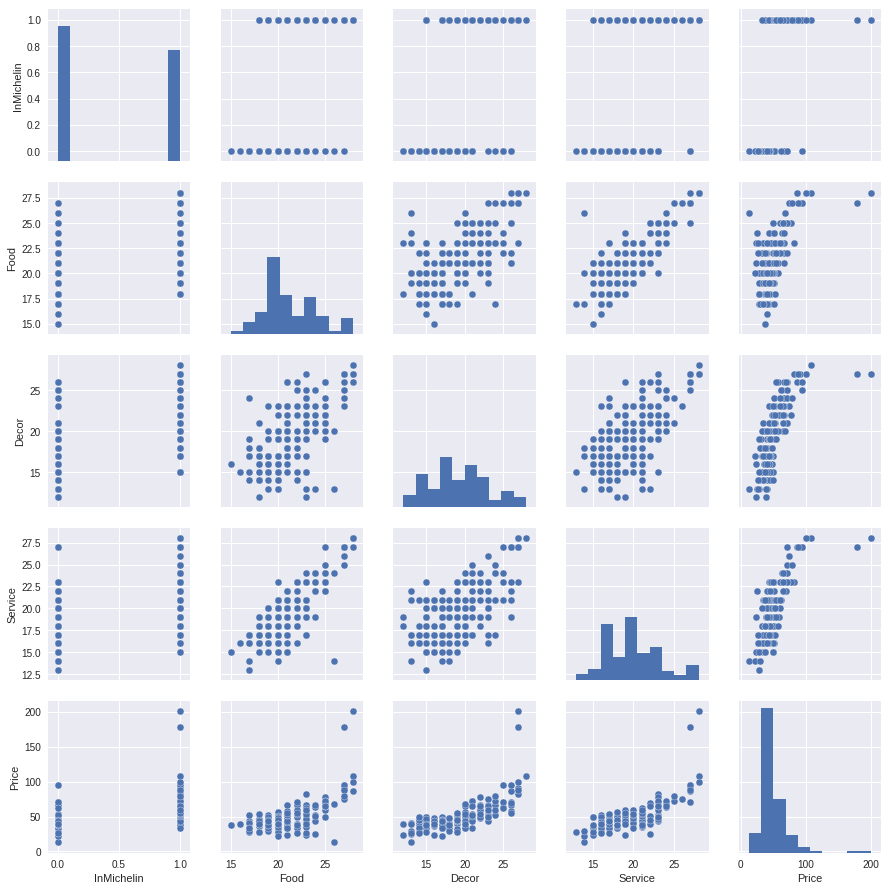

In [5]:
sns.pairplot(df)

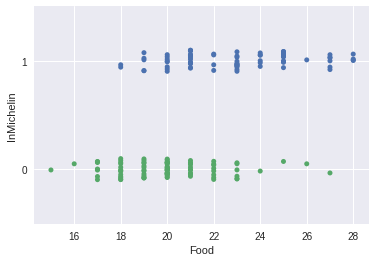

In [6]:
sns.stripplot(x="Food", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)

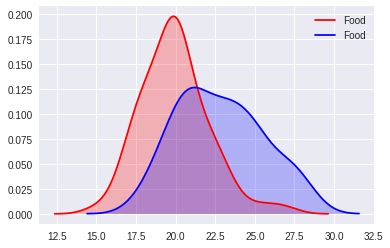

In [7]:
# plot of 2 variables
p1=sns.kdeplot(df[df.InMichelin==0]['Food'], shade=True, color="r")
p1=sns.kdeplot(df[df.InMichelin==1]['Food'], shade=True, color="b")
#sns.plt.show()

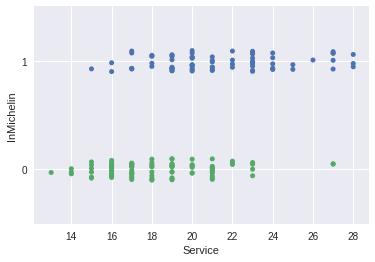

In [8]:
sns.stripplot(x="Service", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

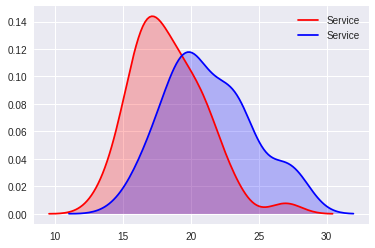

In [9]:
# plot of 2 variables
p1=sns.kdeplot(df[df.InMichelin==0]['Service'], shade=True, color="r")
p1=sns.kdeplot(df[df.InMichelin==1]['Service'], shade=True, color="b")
#sns.plt.show()

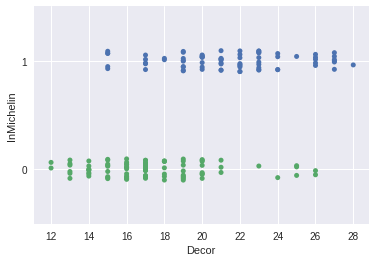

In [10]:
sns.stripplot(x="Decor", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

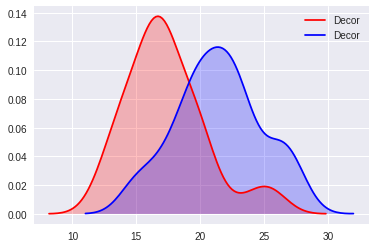

In [11]:
p1=sns.kdeplot(df[df.InMichelin==0]['Decor'], shade=True, color="r")
p1=sns.kdeplot(df[df.InMichelin==1]['Decor'], shade=True, color="b")
#sns.plt.show()

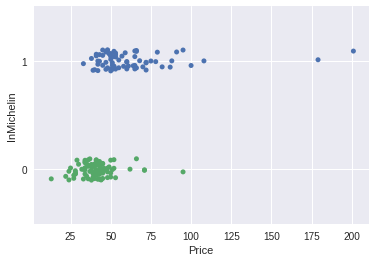

In [12]:
sns.stripplot(x="Price", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

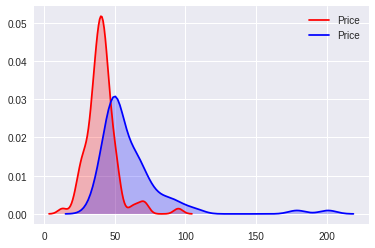

In [13]:
# plot of 2 variables
p1=sns.kdeplot(df[df.InMichelin==0]['Price'], shade=True, color="r")
p1=sns.kdeplot(df[df.InMichelin==1]['Price'], shade=True, color="b")
#sns.plt.show()

In [14]:
df['log_price']=df['Price'].apply(lambda x:math.log(x))

NameError: ignored

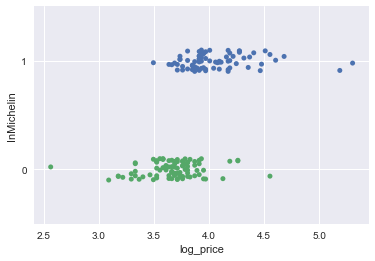

In [0]:
sns.stripplot(x="log_price", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

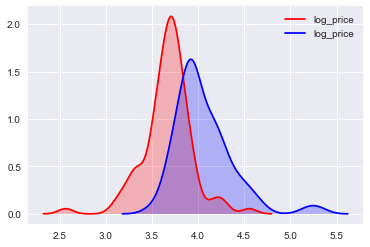

In [0]:
# plot of 2 variables
p1=sns.kdeplot(df[df.InMichelin==0]['log_price'], shade=True, color="r")
p1=sns.kdeplot(df[df.InMichelin==1]['log_price'], shade=True, color="b")
#sns.plt.show()

In [0]:
df['total_score']=df['Service']+df['Food']+df['Decor']

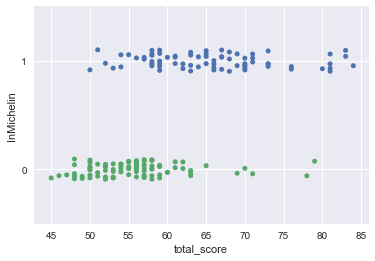

In [0]:

sns.stripplot(x="total_score", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

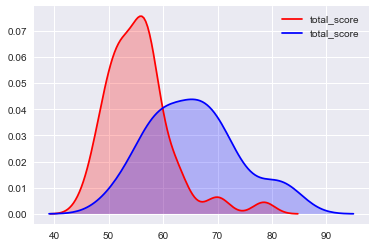

In [0]:
# plot of 2 variables
p1=sns.kdeplot(df[df.InMichelin==0]['total_score'], shade=True, color="r")
p1=sns.kdeplot(df[df.InMichelin==1]['total_score'], shade=True, color="b")
#sns.plt.show()

In [0]:
train = df[:int(len(df)*0.7)]
test = df[int(len(df)*0.7):]

In [0]:
model = sm.Logit.from_formula("InMichelin ~ Food + Decor + Service + Price", train)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  114
Model:                          Logit   Df Residuals:                      109
Method:                           MLE   Df Model:                            4
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:                  0.3585
Time:                        02:51:17   Log-Likelihood:                -49.774
converged:                       True   LL-Null:                       -77.592
                                        LLR p-value:                 2.391e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.7873      2.791     -4.223      0.000     -17.258      -6.316
Food           0.4113      0.156      2.636      0.008       0.105       0.717
Decor          0.1131      0.103      1.096      0.2

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfX0 = train[['Food','Decor','Service','Price']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,117.027013,Food
1,53.546780,Decor
2,119.074516,Service
3,15.643817,Price


In [0]:
model = sm.Logit.from_formula("InMichelin ~ Food + Decor + Service + log_price", train)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  114
Model:                          Logit   Df Residuals:                      109
Method:                           MLE   Df Model:                            4
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:                  0.3990
Time:                        02:51:17   Log-Likelihood:                -46.629
converged:                       True   LL-Null:                       -77.592
                                        LLR p-value:                 1.142e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.4683      5.831     -4.711      0.000     -38.897     -16.040
Food           0.5309      0.188      2.829      0.005       0.163       0.899
Decor          0.0573      0.104      0.552      0.5

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfX0 = train[['Food','Decor','Service','log_price']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,126.120351,Food
1,52.406858,Decor
2,112.369623,Service
3,125.488823,log_price


In [0]:
model = sm.Logit.from_formula("InMichelin ~ total_score + Price", train)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  114
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:                  0.3257
Time:                        02:51:17   Log-Likelihood:                -52.321
converged:                       True   LL-Null:                       -77.592
                                        LLR p-value:                 1.059e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.3367      2.521     -4.100      0.000     -15.278      -5.395
total_score     0.1174      0.055      2.116      0.034       0.009       0.226
Price           0.0609      0.034      1.797    

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfX0 = train[['total_score','Price']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,12.429245,total_score
1,12.429245,Price


In [0]:
model = sm.Logit.from_formula("InMichelin ~ total_score + log_price", train)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  114
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:                  0.3512
Time:                        02:51:18   Log-Likelihood:                -50.342
converged:                       True   LL-Null:                       -77.592
                                        LLR p-value:                 1.464e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.3704      5.245     -4.265      0.000     -32.651     -12.090
total_score     0.0905      0.053      1.696      0.090      -0.014       0.195
log_price       4.3042      1.743      2.470    

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfX0 = train[['total_score','log_price']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,124.039216,total_score
1,124.039216,log_price


In [0]:
model = sm.Logit.from_formula("InMichelin ~ log_price", train)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  114
Model:                          Logit   Df Residuals:                      112
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:                  0.3317
Time:                        02:51:18   Log-Likelihood:                -51.855
converged:                       True   LL-Null:                       -77.592
                                        LLR p-value:                 7.260e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.0686      5.143     -4.874      0.000     -35.149     -14.988
log_price      6.4046      1.330      4.815      0.000       3.798       9.011


In [0]:
train.describe()

,InMichelin,Food,Decor,Service,Price,log_price,total_score
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.421053,21.324561,19.228070,19.938596,50.149123,3.847191,60.491228
std,0.495908,2.817441,3.951106,3.441766,20.978384,0.360639,9.020376
min,0.000000,16.000000,12.000000,13.000000,13.000000,2.564949,45.000000
25%,0.000000,20.000000,16.000000,17.000000,39.000000,3.663562,54.000000
50%,0.000000,21.000000,19.000000,20.000000,46.000000,3.828641,58.000000
75%,1.000000,23.000000,22.000000,22.000000,52.750000,3.965530,66.000000
max,1.000000,28.000000,28.000000,28.000000,179.000000,5.187386,84.000000


In [0]:
y_fit = result.predict(train[['log_price']]).apply(lambda x: 1 if x>0.5 else 0)

(0, 6)

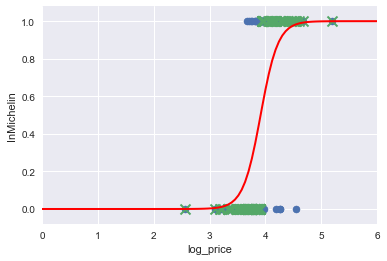

In [0]:
train.plot(kind="scatter", x="log_price", y="InMichelin", s=50, alpha=0.5)
xx = pd.DataFrame(np.linspace(0, 6, 100))
xx.columns = ['log_price']
plt.plot(xx, result.predict(xx), "r", lw=2)
plt.scatter(train['log_price'], train['InMichelin'], marker='o', s=50)
plt.scatter(train['log_price'], y_fit, marker='x', s=100, lw=2, cmap=mpl.cm.jet)
plt.xlim(0, 6)

In [0]:
sum(train['InMichelin']==y_fit)/len(y_fit)

0.7807017543859649

In [0]:
y_fit = result.predict(test[['log_price']]).apply(lambda x: 1 if x>0.5 else 0)

(0, 6)

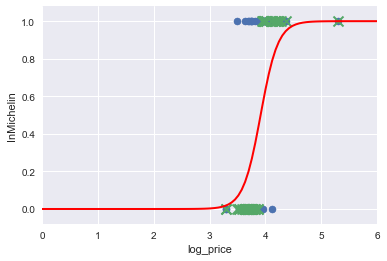

In [0]:
test.plot(kind="scatter", x="log_price", y="InMichelin", s=50, alpha=0.5)
xx = pd.DataFrame(np.linspace(0, 6, 100))
xx.columns = ['log_price']
plt.plot(xx, result.predict(xx), "r", lw=2)
plt.scatter(test['log_price'], test['InMichelin'], marker='o', s=50)
plt.scatter(test['log_price'], y_fit, marker='x', s=100, lw=2, cmap=mpl.cm.jet)
plt.xlim(0, 6)

In [0]:
sum(test['InMichelin']==y_fit)/len(y_fit)

0.76000000000000001

In [0]:
# logistic regression
# http://3months.tistory.com/27